In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
plt.style.use('ggplot')

# Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

# Loading the data set

In [14]:
df = pd.read_csv(r"C:\Users\Microsoft\Downloads\ToyotaCorolla -CSV.csv")
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [15]:
df.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

# EDA

#Summary statics

In [16]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#Missing values

In [18]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

#histogram

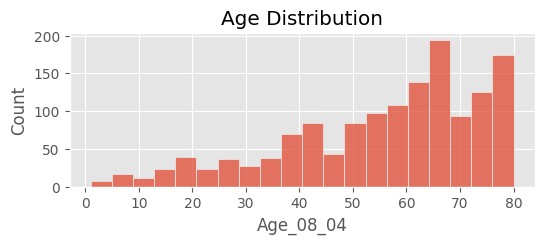

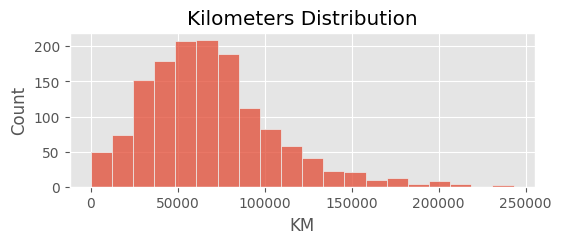

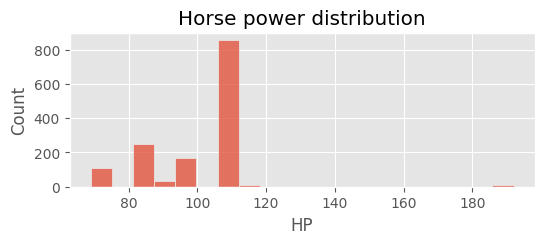

In [21]:
#histplot of age
plt.figure(figsize=(6, 2))
sns.histplot(df['Age_08_04'], bins=20)
plt.title('Age Distribution')
plt.show()
#histplot of km
plt.figure(figsize=(6,2))
sns.histplot(df['KM'], bins=20)
plt.title('Kilometers Distribution')
plt.show()
#histplot of HP,
plt.figure(figsize=(6,2))
sns.histplot(df['HP'],bins=20)
plt.title('Horse power distribution')
plt.show()
#histplot of cc
plt.figure(figsize=(6,2))
sns.histplot(df['cc'],bins = 20)
plt.title('cylinder volume distribution')
plt.show()
#Histplot of Weight
plt.figure(figsize=(6,2))
sns.histplot(df['Weight'],bins=20)
plt.title('Weight Distribution')
plt.show()

#Bar charts



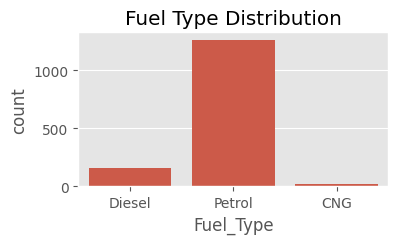

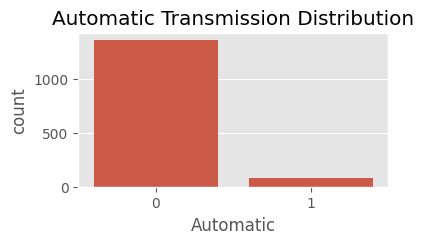

In [22]:
#bar chart for fuel type 
plt.figure(figsize=(4,2))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

plt.figure(figsize=(4,2))
sns.countplot(x='Automatic', data=df)
plt.title('Automatic Transmission Distribution')
plt.show()

plt.figure(figsize=(4,2))
sns.countplot(x='Doors', data=df)
plt.title('Number of Doors Distribution')
plt.show()

#Scatter plot

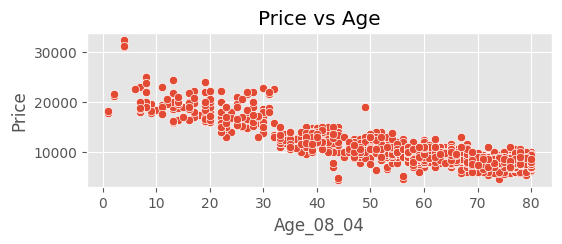

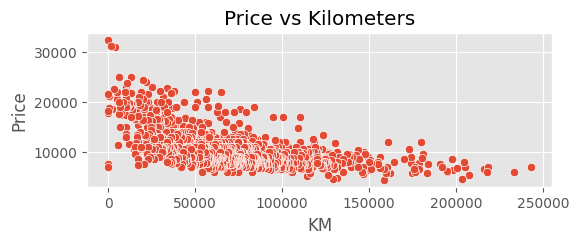

In [23]:
plt.figure(figsize=(6,2))
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Price vs Age')
plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Price vs Kilometers')
plt.show()


# split the train and test 

In [26]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [29]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [43]:
# Split the dataset into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X,y

(      Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
 0            23  46986    Diesel   90          0  2000      3          4   
 1            23  72937    Diesel   90          0  2000      3          4   
 2            24  41711    Diesel   90          0  2000      3          4   
 3            26  48000    Diesel   90          0  2000      3          4   
 4            30  38500    Diesel   90          0  2000      3          4   
 ...         ...    ...       ...  ...        ...   ...    ...        ...   
 1431         69  20544    Petrol   86          0  1300      3          4   
 1432         72  19000    Petrol   86          0  1300      3          4   
 1433         71  17016    Petrol   86          0  1300      3          4   
 1434         70  16916    Petrol   86          0  1300      3          4   
 1435         76      1    Petrol  110          0  1600      5          4   
 
       Gears  Weight  
 0         5    1165  
 1         5    1165  
 2   

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

# MLR model(built 3 differ models)

In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [58]:
X = pd.get_dummies(df, columns=['Fuel_Type'])


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Fuel_Type'] = le.fit_transform(X_train['Fuel_Type'])
X_test['Fuel_Type'] = le.transform(X_test['Fuel_Type'])

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [69]:

# Build minimum of 3 different models
modela = LinearRegression()
modela.fit(X_train[['Age_08_04', 'KM', 'HP']], y_train)


LinearRegression()

In [70]:
model2 = LinearRegression()
model2.fit(X_train[['Age_08_04', 'Fuel_Type', 'cc']], y_train)



LinearRegression()

In [71]:
model3 = LinearRegression()
model3.fit(X_train[['Age_08_04', 'Doors', 'Weight']], y_train)


LinearRegression()

# Evaluate model

In [73]:
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R-squared: {r2}")


MSE: 2096851.140017704, R-squared: 0.8428476112018002


# lasso & ridge

In [77]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train_scaled, y_train)



Lasso(alpha=0.1)

In [79]:
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_lasso

array([11176.89145932,  8969.10008629,  9390.8922    ,  8960.09306721,
       10094.1398326 ,  7913.57471384,  8711.45383404,  8272.38567126,
       14099.53155229, 13127.79801498,  9501.57770975,  9334.34241856,
       12951.99790602, 12972.8205264 ,  9790.53752634,  8265.3035272 ,
       12224.49987642, 17544.17713739,  7438.58427892,  9163.32537674,
       12709.41058748, 17800.20082761,  7897.45677159, 10411.7085265 ,
        7510.5905176 , 16022.8936656 , 10008.79197541,  7384.03001798,
       15660.5901961 , 14492.95543149,  8163.54779906,  9722.22893704,
        8517.37206552, 10117.36811276, 10270.67301825,  8061.06874634,
        8826.95669059,  9983.46857097, 16368.97634212,  9602.3784172 ,
        9855.48999449,  9524.13000611,  7887.20313033,  5591.12264378,
        6813.85289804, 17188.26313839,  9454.61094209, 10708.29725297,
        8717.97626834, 13466.62346888, 12986.51338916,  6339.32271804,
       14945.54454335, 16285.73754813,  6104.11818695,  7772.87134205,
      

In [80]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(X_train_scaled, y_train)



Ridge(alpha=0.1)

In [81]:
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_ridge

array([11176.9257486 ,  8969.24915005,  9390.67356625,  8960.13533136,
       10094.18165641,  7913.71459048,  8711.44154716,  8272.67671653,
       14099.23436088, 13127.68435012,  9501.60159155,  9334.55540536,
       12951.82488494, 12972.68162133,  9790.60284984,  8265.35870213,
       12224.3604672 , 17543.9737799 ,  7438.63189419,  9163.40320967,
       12709.28348108, 17800.00973181,  7897.74328766, 10411.73889954,
        7510.43697139, 16022.77179246, 10009.0340335 ,  7384.10058605,
       15660.43669245, 14492.72709532,  8163.72229411,  9722.10696532,
        8517.46684922, 10117.4295475 , 10270.76128371,  8061.28639511,
        8826.90352937,  9983.53907187, 16368.75181313,  9602.23667327,
        9855.63559909,  9524.28261888,  7887.31762733,  5591.03480229,
        6813.97905316, 17188.04098068,  9454.71888731, 10708.21905931,
        8718.0456667 , 13466.53660305, 12986.5205455 ,  6339.52832627,
       14945.33089699, 16285.88125395,  6104.08762693,  7772.93332859,
      

1.What is Normalization & Standardization and how is it helpful?

Ans:Normalization and standardization are techniques used to scale data to a common range, helping to prevent features with large ranges from dominating the model and improve model performance. Normalization scales data between a specific range ,while standardization scales data to have a mean of 0 and a standard deviation of 1

2.What techniques can be used to address multicollinearity in multiple linear regression?

To address multicollinearity in multiple linear regression, techniques such as feature selection  and regularization can be used to reduce the impact of correlated features on the model. Additionally, dimensionality reduction techniques like PCA (Principal Component Analysis) can also be employed to reduce multicollinearity.